<a href="https://colab.research.google.com/github/UTEDungNguyen/AI-Homework04/blob/main/%C4%90i%E1%BB%81u_khi%E1%BB%83n_%C4%90%E1%BB%99ng_c%C6%A1_DC_Servo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 13.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=8d0ebc7fff61021337ee8301a6f98d115ec72e1151e93304de5008aa0e603287
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


In [2]:
import  numpy as np
import skfuzzy as fzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axis3d 

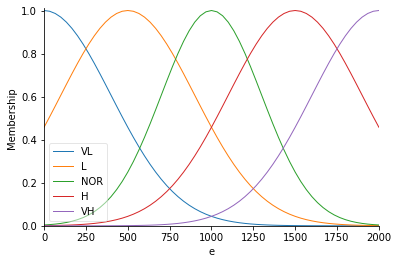

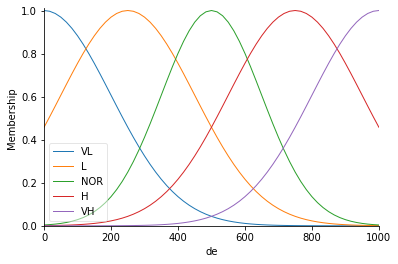

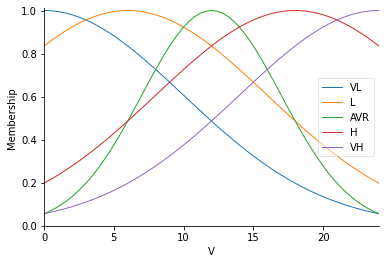

In [32]:
# Thông số đầu vào sai số e (Chọn e trong khoảng từ 0-2000(RPM))
Universe_1 = np.linspace(0,2000,61) #e
# Thông số đầu vào đạo hàm của sai số e (Chọn de trong khoảng từ 0-1000(RPM))
Universe_2 = np.linspace(0,1000,61) #de
# Thông số đầu ra Điện áp cấp vào Động cơ DC (Chọn V trong khoảng từ 0-24(V))
Universe_3 = np.linspace(0,24,61) # V

### tạo biến đầu vào 
e = ctrl.Antecedent(Universe_1,'e')
de= ctrl.Antecedent(Universe_2,'de')
V = ctrl.Consequent(Universe_3,'V')

e['VL'] = fzz.gaussmf(e.universe,0,400)
e['L'] = fzz.gaussmf(e.universe,500,400)
e['NOR'] = fzz.gaussmf(e.universe,1000,300)
e['H'] = fzz.gaussmf(e.universe,1500,400)
e['VH'] = fzz.gaussmf(e.universe,2000,400)
e.view()

de['VL'] = fzz.gaussmf(de.universe,0,200)
de['L'] = fzz.gaussmf(de.universe,250,200)
de['NOR'] = fzz.gaussmf(de.universe,500,150)
de['H'] = fzz.gaussmf(de.universe,750,200)
de['VH'] = fzz.gaussmf(de.universe,1000,200)
de.view()

V['VL'] = fzz.gaussmf(V.universe,0,10)
V['L'] = fzz.gaussmf(V.universe,6,10)
V['AVR'] = fzz.gaussmf(V.universe,12,5)
V['H'] = fzz.gaussmf(V.universe,18,10)
V['VH'] = fzz.gaussmf(V.universe,24,10)
V.view()

In [33]:
#rule
rule = []

rule.append(ctrl.Rule(antecedent=(e['VL'] & de['VL'])|(e['VL'] & de['L'])|
(e['L'] & de['VL']), consequent=V['VL'], label='Rule VL'))

rule.append(ctrl.Rule(antecedent=(e['NOR'] & de['VL'])|(e['L'] & de['L'])|
(e['L'] & de['NOR'])|(e['L'] & de['H'])|(e['L'] & de['VH'])|
(e['VL'] & de['NOR'])|(e['VL'] & de['H'])|(e['VL'] & de['VH']), consequent=V['L'], label='Rule L'))

rule.append(ctrl.Rule(antecedent=(e['NOR'] & de['L'])|(e['NOR'] & de['NOR'])|
(e['NOR'] & de['H'])|(e['NOR'] & de['VH'])|(e['H'] & de['VL']), consequent=V['AVR'], label='Rule AVR'))

rule.append(ctrl.Rule(antecedent=((e['VH'] & de['VL'])|(e['VH'] & de['L'])|
(e['VH'] & de['NOR']) | (e['H'] & de['L']) | (e['H'] & de['NOR'])), consequent=V['H'], label='Rule H'))

rule.append(ctrl.Rule(antecedent=(e['H'] & de['H'])|(e['H'] & de['VH'])|
(e['VH'] & de['H'])|(e['VH'] & de['VH']), consequent=V['VH'], label='Rule VH'))

In [34]:
from networkx.algorithms.bipartite import projection
#control
system = ctrl.ControlSystem(rule)
simulation = ctrl.ControlSystemSimulation(system,flush_after_run = 61*61+1)

upsampled1 = np.linspace(0,2000,61)
upsampled2 = np.linspace(0,1000,61)
x,y = np.meshgrid(upsampled1, upsampled2)
z   = np.zeros_like(x)
for i in range(61) :
  for j in range(61) :
    simulation.input['e'] = x[i,j]
    simulation.input['de'] = y[i,j]
    simulation.compute()

    z[i,j] = simulation.output['V']

<ipython-input-80-9c124777eca4>:5: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 100)
<ipython-input-80-9c124777eca4>:6: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'x', offset = 2250, cmap = 'viridis', anpha = 100)
<ipython-input-80-9c124777eca4>:7: UserWarning: The following kwargs were not used by contour: 'anpha'
  cset = ax.contourf(x,y,z, zdir = 'y', offset = -85, cmap = 'viridis', anpha = 100)


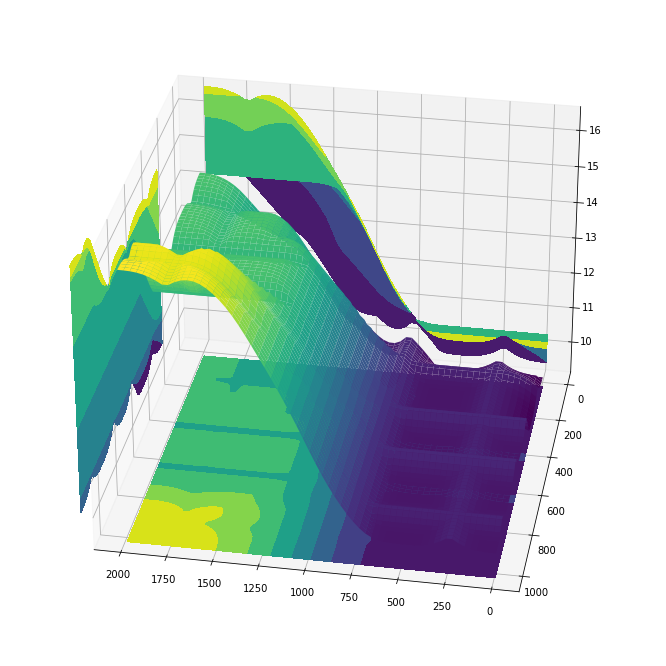

In [80]:
#Xuất đồ thị hình 8x * 8y
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111, projection='3d')
suf = ax.plot_surface(x,y,z, rstride = 1, cstride = 1, cmap = 'viridis', linewidth = 0.4, antialiased = True)
cset = ax.contourf(x,y,z, zdir = 'z', offset = 9, cmap = 'viridis', anpha = 100)
cset = ax.contourf(x,y,z, zdir = 'x', offset = 2250, cmap = 'viridis', anpha = 100)
cset = ax.contourf(x,y,z, zdir = 'y', offset = -85, cmap = 'viridis', anpha = 100)
ax.view_init(30,100)